In [1]:
import os
import cv2
import editdistance
from fuzzywuzzy import fuzz
from tqdm import tqdm_notebook as tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.listdir()

/home/rob/anaconda3/envs/hwrtf/lib/python3.6/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


['.ipynb_checkpoints',
 'zooniverse_words_for_training.csv',
 'zooniverse_predictions.txt',
 'aarhus_predictions.txt',
 "Compare predictions to 'GT' - zooniverse.ipynb",
 'Aarhus M alcon specimen label data.xls',
 'zooniverse_word_scores.csv',
 "Compare predictions to 'GT' - aarhus.ipynb",
 '.~lock.danish-butterflies-and-moths-2020-challenge-classifications.csv#',
 'danish-butterflies-and-moths-2020-challenge-classifications.csv',
 'Show example zooniverse images.ipynb',
 'zooniverse_transcriptions_per_user.csv',
 'zooniverse_transcriptions.csv',
 "Compare predictions to 'GT' - aarhus-Copy1.ipynb",
 'aarhus_word_scores.csv',
 'Download Zooniverse Images.ipynb',
 'test_words_for_SimpleHTR',
 'Show example zooniverse images-Copy1.ipynb']

In [12]:
fps = []
preds = []
with open('copenhagen_predictions.txt','r') as f:
    for line in f.readlines():
        exec('line = [' + line.replace('] [','],[').replace('] None [','], None, [') + ']')
        for i in range(len(line)):
            if i == 0:
                fps += line[i]
            elif i == 1:
                preds += line[i]
        if len(fps) != len(preds):
            print('wtf')
len(fps),len(preds)
preds = pd.DataFrame(np.array([fps,preds]).T,columns=['fp','pred'])
preds['cat_no'] = preds['fp'].map(lambda x: x.split('NHMD-')[1].split('_')[0])
preds = preds[['cat_no','pred','fp']]
#preds['gt'] = np.nan
#preds['score'] = np.nan
#preds = preds.sample(frac=1)
preds

,cat_no,pred,fp
0,227630,ml,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
1,227633,prasn,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
2,227815,Faral,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
3,227832,W.k,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
4,227541,141-7-12G31,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
5,227548,Nnd-,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
6,227387,,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
7,227494,lFScepleh,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
8,227737,227737,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...
9,227389,Noitrl,/home/rob/HWR/datasets/Copenhagen/Words/NHMD-2...


In [7]:
gt = pd.read_excel('copenhagen_gt.xlsx')
gt = gt.replace('UNKNOWN',np.nan).replace('Unclear',np.nan)
gt['Specimen'] = gt['ID (number)']
gt = gt[['Specimen','Day','Month','Year','Locality','Collector']]
gt = gt.rename(columns={'Specimen':'subject_ids','Day':'day','Month':'month','Year':'year','Locality':'loc.','Collector':'collector'})
#gt['day'] = gt['day'].map(lambda x: str(int(x)) if not np.isnan(x) else x)
#gt['month'] = gt['month'].map(lambda x: str(int(x)) if not np.isnan(x) else x)
#gt['year'] = gt['year'].map(lambda x: str(int(x)) if not np.isnan(x) else x)
gt = gt.set_index('subject_ids').stack().reset_index().rename(columns = {'level_1':'label',0:'gt'})

gt.head()

,subject_ids,label,gt
0,199006,day,6
1,199006,month,8
2,199006,year,1950
3,199006,loc.,Fanø
4,199007,day,23


In [15]:
gt['pred'] = np.nan
gt['pred_score'] = np.nan
gt['dist'] = np.nan
gt['n'] = np.nan
for name,row in tqdm(gt.iterrows(),total=len(gt)):
    gtText = str(row['gt'])
    cat_no = str(row['subject_ids'])
    possible_preds = preds[preds['cat_no'] == str(cat_no)]['pred'].values
    
    best_score = 0
    best_gt = ''
    if len(possible_preds):
        for possible_pred in possible_preds:
            score = fuzz.token_sort_ratio(gtText,possible_pred)
            #print(pred, possible_gt, score)
            if score > best_score:
                gt.loc[name,'pred'] = possible_pred
                gt.loc[name,'pred_score'] = score
                gt.loc[name,'dist'] = editdistance.eval(possible_pred,gtText)
                gt.loc[name,'n'] = len(gtText)
                best_score = score
    else:
        gt.loc[name,'dist'] = editdistance.eval('',gtText)
    
    gt.loc[name,'n'] = len(gtText)

In [16]:
CER = gt['dist'].sum()/gt['n'].sum()
CER

1.0628883801336262

In [17]:
len(gt[gt['pred'] == gt['gt']])/len(gt)

0.0

In [3]:
gt = pd.read_csv('zooniverse_transcriptions.csv',index_col=[0,1]).swaplevel(0,1)
gt = gt[gt['#agree_fuzz']>=2][['best_fuzz','#agree_fuzz']].reset_index().rename(columns={'level_1':'label'})
gt.head()

,subject_ids,label,best_fuzz,#agree_fuzz
0,219401,coll,Mus. Hauschild,6.0
1,219402,coll,Coll. V. Thomsen,2.0
2,219407,coll,Coll. V. Thomsen,2.0
3,219408,coll,Coll. Klöcker,2.0
4,219409,coll,Coll. Klöcker,2.0


In [5]:

def expand_list(_gts):
    gts_copy = list(_gts.copy())
    for gt in _gts:
        if len(gt.split(' ')) > 1:
            gts = gt.split(' ')
            for i in range(len(gts)):
                for j in range(i,len(gts)):
                    b = ' '.join(gts[i:j+1])
                    if len(b):
                        gts_copy += [b]
    return np.unique(gts_copy)

In [6]:

def get_day_month_year_from_group(group):
    day = group[group['label']=='day']['gt'].values
    if len(day):
        try:
            day = str(int(day[0]))
        except:
            year = np.nan
    else:
        day = np.nan
    month = group[group['label']=='month']['gt'].values
    if len(month):
        try:
            month = str(int(month[0]))
        except:
            year = np.nan
    else:
        month = np.nan    
    year = group[group['label']=='year']['gt'].values
    if len(year):
        try:
            year = str(int(year[0]))
        except:
            year = np.nan
    else:
        year = np.nan
    return day,month,year

def make_date_combinations(day,month,year):
    seperators = ['.','/','-']
    combs = []
    if not np.isnan(float(year)):
        year_short = year[2:]
    for seperator in seperators:
        if np.isnan(float(day)) & np.isnan(float(month)) & np.isnan(float(year)):
            continue
        elif np.isnan(float(day)) & np.isnan(float(month)):
            continue
        elif np.isnan(float(month)) & np.isnan(float(year)):
            continue
        elif np.isnan(float(day)) & np.isnan(float(year)):
            continue
        elif np.isnan(float(day)):
            combs += [seperator.join([month,year])]
            combs += [seperator.join([month,year_short])]
        elif np.isnan(float(month)):
            continue
        elif np.isnan(float(year)):
            combs += [seperator.join([day,month])]
        else:
            combs += [seperator.join([day,month,year])]
            combs += [seperator.join([day,month,year_short])]
            combs += [seperator.join([day,month])]
            combs += [seperator.join([month,year])]
            combs += [seperator.join([month,year_short])]
    return combs
make_date_combinations('10','10','1910')

['10.10.1910',
 '10.10.10',
 '10.10',
 '10.1910',
 '10.10',
 '10/10/1910',
 '10/10/10',
 '10/10',
 '10/1910',
 '10/10',
 '10-10-1910',
 '10-10-10',
 '10-10',
 '10-1910',
 '10-10']

In [7]:

fps = []
preds = []
with open('aarhus_predictions.txt','r') as f:
    for line in f.readlines():
        exec('line = [' + line.replace('] [','],[').replace('] None [','], None, [') + ']')
        for i in range(len(line)):
            if i == 0:
                fps += line[i]
            elif i == 1:
                preds += line[i]
        if len(fps) != len(preds):
            print('wtf')
len(fps),len(preds)
preds = pd.DataFrame(np.array([fps,preds]).T,columns=['fp','pred'])
preds['cat_no'] = preds['fp'].map(lambda x: x.split('/')[7].split('_')[0])
preds = preds[['cat_no','pred','fp']]
preds['gt'] = np.nan
preds['score'] = np.nan
preds = preds.sample(frac=1)
for name,row in tqdm(preds.iterrows(),total = len(preds)):
    pred = row['pred']
    cat_no = row['cat_no']
    fp = row['fp']
    #img = cv2.imread(fp)
    #plt.imshow(img)
    subject_gts = gt[gt['subject_ids']==cat_no]
    day,month,year = get_day_month_year_from_group(subject_gts)
    possible_gts = subject_gts['gt'].values
    possible_gts = list(expand_list(possible_gts))
    possible_gts += make_date_combinations(day,month,year)
    possible_gts += ['Coll','Coll.','Dania','zmuc','Dania, coll.']
    
    best_score = 0
    best_gt = ''
    #print(possible_gts)
    if len(possible_gts):
        for possible_gt in possible_gts:
            score = fuzz.token_sort_ratio(pred,possible_gt)
            #print(pred, possible_gt, score)
            if score > best_score:
                preds.loc[name,'gt'] = possible_gt
                preds.loc[name,'score'] = score
                best_score = score

In [41]:
possible_gts

array([20.0, 7.0, 1934.0, 'Læsø', 'Findal'], dtype=object)

In [10]:
len(preds),len(preds.dropna()),len(preds[preds['score']>=70])

(2000, 1916, 92)

In [11]:
preds.to_csv('aarhus_word_scores.csv')

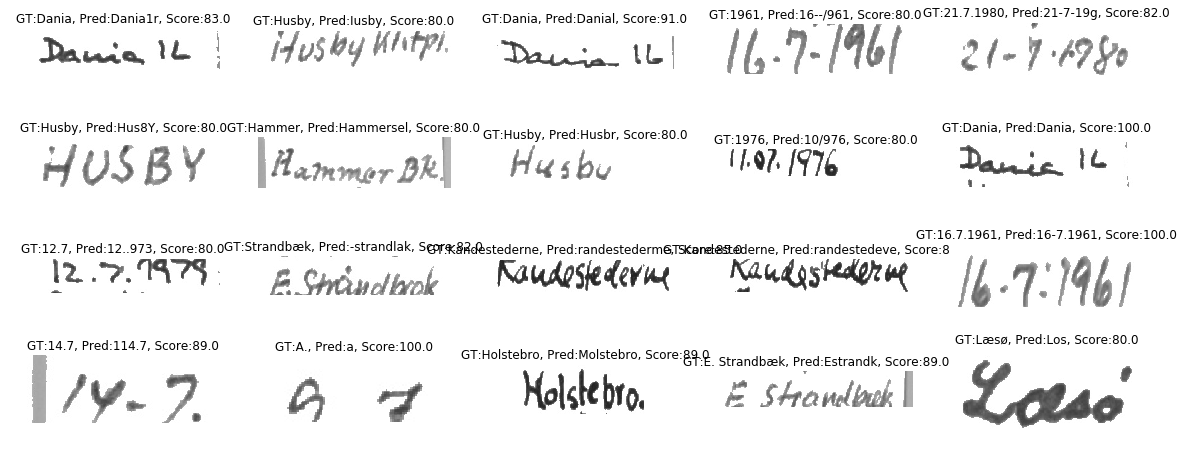

In [69]:
preds = preds.sample(frac=1)

n_cols = 5
n_rows = 4

n_images = n_cols*n_rows
min_score=80
fps = preds[preds['score']>=min_score]['fp'].values
gts = preds[preds['score']>=min_score]['gt'].values
ps = preds[preds['score']>=min_score]['pred'].values
scores = preds[preds['score']>=min_score]['score'].values

fig = plt.figure(figsize=(n_cols*4, n_rows*2))

for i in range(1,n_images+1):
    try:
        img = cv2.imread(fps[i])
        fig.add_subplot(n_rows, n_cols, i)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('GT:' + gts[i] + ', Pred:' + ps[i] + ', Score:'+str(scores[i]))
        plt.axis('off')
    except Exception as ex:
        print('Exception: %s'%ex)
        pass
plt.show()


In [368]:
preds.dropna()[preds.dropna()['gt'].map(lambda x: 'ø' in x)]

,cat_no,pred,fp,gt,score
3488,221709,Wostende,/home/rob/HWR/datasets/zooniverse/words/221709...,Klostermølle,53.0
7921,219637,is,/home/rob/HWR/datasets/zooniverse/words/219637...,Broksø,29.0
9898,219773,somder00r9,/home/rob/HWR/datasets/zooniverse/words/219773...,Sønderborg,53.0
8729,221892,-ostennokle,/home/rob/HWR/datasets/zooniverse/words/221892...,Klostermølle,57.0
1630,222432,Grontalt,/home/rob/HWR/datasets/zooniverse/words/222432...,grønholt,67.0
6428,219404,Lite,/home/rob/HWR/datasets/zooniverse/words/219404...,Søllerød,40.0
699,220386,Horblege,/home/rob/HWR/datasets/zooniverse/words/220386...,Høvblege,80.0
9761,220981,Fns,/home/rob/HWR/datasets/zooniverse/words/220981...,Søby,33.0
1430,219773,Pil-ergensen,/home/rob/HWR/datasets/zooniverse/words/219773...,L. Jørgensen,82.0
1940,222816,les,/home/rob/HWR/datasets/zooniverse/words/222816...,Ganløse,44.0


In [145]:
fps = []
preds = []
with open('zooniverse_predictions.txt','r') as f:
    for line in f.readlines():
        for i in range(len(line.split('['))):
            _list = line.split('[')[i]
            _list = _list.split('] ')[0]
            _list = _list.replace("'",'')
            _list = _list.split(',')
            _list = [x.strip() for x in _list]
            if i == 1:
                fps += _list
                print(len(_list))
            elif i == 2:
                preds += _list
                print(_list)
        if len(preds) != len(fps):
            print('wtf')
            print(line.split('[')[2])
            break
                    

200
['Tntlleck', 'Fxoster', 'call', 'iby', 'bo', 'zmmuc', '977-69', 'Vibdra', '1/7-3', 'call', '1-70g6', '193', '6alh', 'Mitieon', 'ZilUAser', 'Gammekhas', 'anand', 'Weis', '0l3', 'Fensen', 'IVAM2', 'Ptl-Wy', '1957-1260', 'Bas', 'INtdnke', 'zmuc', 'lanritzek', 'e', 'ymerad', 'Dansiz-cok', '7', '0alh', '20-2-63', 'o', 'Danior', 'ZnteSero', 'srewed', 'fo', 'in', 'Coll', 'oe', 'WiLanfemanh', 'zmuc', 'Teniteoions', '1ag-6', 'pinarIm', 'elelous', 'gersenaley', 'unn', 'I', 'Lwd', 'Henritsen', '34', 'ZlA48', 'Eadngeos', 'pasterase', 'rorin', 'gidr', '00n73391', 'addrecen', 's', 'FamemnPeterses', 'Pédensen', 'Gronnal', 'cank', 'Dte', '1-7-19686.', 'iloplek', 'catl', '', '"9"', 'a9', 'Tteleoz', 'HOpLERe', 'col-aresersen', 'aribstou', 'Clh', 'Borbzese', 'Rastadnose', 'd', '-in', 'arave', 'Saarisest', 'Wiehlwnd', 'Calk', 'PoE55Ynk', 'inorgiserd', 'a', 'zmec', 'a', 'pana', 'P.', '0', 'Fensen', 'M', 'wole', 'dikeislig', 'Zundovist', '7.4.', 'Icsien', 'U-Ulsert', 'Vchnistollersen', 'dieialea', 'Echo

In [119]:
_list

['33.11498']

In [107]:
df = pd.read_csv('zooniverse_transcriptions_per_user.csv',index_col=1)
df = df.drop(['Unnamed: 0','person','type','name?','sex','accession','labels_vis','created_at','user_id','genital?','index'],axis=1)
df = df.replace('Not specified (unknown)',np.nan).replace('[unclear][/unclear]',np.nan).replace('[uklar][/uklar]',np.nan).replace(False, np.nan).replace('',np.nan).replace(' ',np.nan).dropna(how='all',axis=0)
df = df.stack().reset_index()
for name,group in df.groupby('subject_ids'):
    print(group)
    break

       subject_ids level_1               0
6642        219401    coll  Mus. Hauschild
6643        219401     loc      Jægerspris
6644        219401     day              12
6645        219401   month               9
6646        219401    year            1914
11352       219401    coll  Mus. Hauschild
11353       219401     loc      Jægerspris
11354       219401     day              12
11355       219401   month               9
14568       219401    coll  Mus. Hauschild
14569       219401     loc      Jægerspris
14570       219401     day              12
14571       219401   month               9
14572       219401    year            1914
